<a href="https://colab.research.google.com/github/gokul8747/PCA_implementation/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### PCA

In [ ]:
def pca(n,x):
    x_mean = np.mean(x,axis=0)
    x_std = np.std(x,axis=0)

    x_standardized = (x-x_mean)/x_std

    cov_mat = np.cov(x_standardized,rowvar=False)

    _,eigen_vectors = np.linalg.eigh(cov_mat)
    eigenvector_subset = eigen_vectors[:,:-n-1:-1]

    return x_standardized @ eigenvector_subset

#### Original Dataset

In [ ]:
data = pd.read_csv("C:\\Users\\ASUS\\Iris.csv",names=["sepal length",
                "sepal width","petal length","petal width","target"])

print("Iris Dataset contains 4 features columns,to determine the species Name")

print("shape of the Iris Data:",data.shape)
display(data)

Iris Dataset contains 4 features columns,to determine the species Name
shape of the Iris Data: (150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Implementation of PCA

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
reduced_data = pca(2,x)
pca_data = pd.DataFrame(reduced_data,columns = ["PC1","PC2"])
pca_data["Target"] = data["target"]
print("After Feature Dimensional Reduction from 4 Feature column Reduced into 2 pc")
display(pca_data)

After Feature Dimensional Reduction from 4 Feature column Reduced into 2 pc


,PC1,PC2,Target
0,2.264542,0.505704,setosa
1,2.086426,-0.655405,setosa
2,2.367950,-0.318477,setosa
3,2.304197,-0.575368,setosa
4,2.388777,0.674767,setosa
...,...,...,...
145,-1.870522,0.382822,virginica
146,-1.558492,-0.905314,virginica
147,-1.520845,0.266795,virginica
148,-1.376391,1.016362,virginica


#### Visualizing the Principal components of the reduced Iris dataset

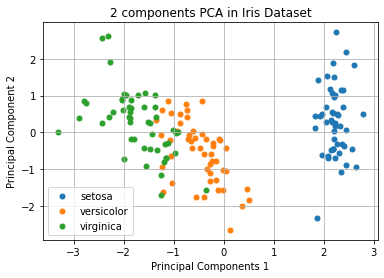

In [ ]:
plt.title('2 components PCA in Iris Dataset')
plt.xlabel('Principal Components 1')
plt.ylabel('Principal Component 2')
targets = np.unique(y)

for target in targets:
    idxs = y == target
    plt.scatter(reduced_data[idxs,0],reduced_data[idxs,1],s=25,label=target)
plt.legend()
plt.grid()
plt.show()